In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, Sequential, optimizers, layers

### 1. 准备数据

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [14]:
print(np.max(x_train), np.min(x_train))

255 0


In [6]:
# plt.subplot?

In [19]:
# 数据归一化处理
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler 接受数据的维度最好 <= 2
scaler.fit(x_train.reshape(-1, 1))
x_train_scaled = scaler.transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [20]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.023143278665243 -0.8105136544337038


### 2. 构建模型

In [21]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
optimizer = optimizers.SGD(learning_rate=0.001)
# reason for sparse: y->index. y->one_hot->[] 
# 通过 sparse 可以使 y 变为向量
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [22]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [23]:
history = model.fit(x_train_scaled, y_train, epochs=7, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/7
55000/55000 [==============================] - 7s 124us/sample - loss: 0.9103 - accuracy: 0.7047 - val_loss: 0.6162 - val_accuracy: 0.7924
Epoch 2/7
55000/55000 [==============================] - 6s 117us/sample - loss: 0.5875 - accuracy: 0.7950 - val_loss: 0.5218 - val_accuracy: 0.8240
Epoch 3/7
55000/55000 [==============================] - 7s 128us/sample - loss: 0.5191 - accuracy: 0.8170 - val_loss: 0.4764 - val_accuracy: 0.8378
Epoch 4/7
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4818 - accuracy: 0.8298 - val_loss: 0.4498 - val_accuracy: 0.8452
Epoch 5/7
55000/55000 [==============================] - 7s 128us/sample - loss: 0.4574 - accuracy: 0.8389 - val_loss: 0.4357 - val_accuracy: 0.8534
Epoch 6/7
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4392 - accuracy: 0.8450 - val_loss: 0.4185 - val_accuracy: 0.8552
Epoch 7/7
55000/55000 [==============================] - 

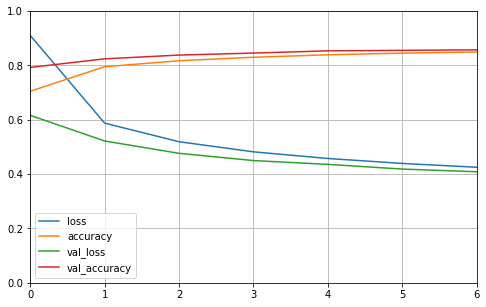

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

plot_learning_curves(history)

In [26]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.451520713186264, 0.8372]